# 시즌별로 나눈 후 개별로 승점을 구하는경우

In [181]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.set_option('display.max_columns', 22)
pd.set_option('display.max_rows',2000)
plt.rcParams['font.family'] = 'AppleGothic'

In [182]:
df = pd.read_csv("/Users/juwonkim/Desktop/캡스톤 디자인/archive/results.csv",encoding='cp949',index_col=0) 
df.shape

(11113, 22)

Column	Description
Season	Match Season
DateTime	Match Date and Time (yyyy-mm-dd hh:mm:ss)
HomeTeam	Home Team
AwayTeam	Away Team
FTHG	Full Time Home Team Goals
FTAG	Full Time Away Team Goals
FTR	Full Time Result (H=Home Win, D=Draw, A=Away Win)
HTHG	Half Time Home Team Goals
HTAG	Half Time Away Team Goals
HTR	Half Time Result (H=Home Win, D=Draw, A=Away Win)
Referee	Match Referee
HS	Home Team Shots
AS	Away Team Shots
HST	Home Team Shots on Target
AST	Away Team Shots on Target
HC	Home Team Corners
AC	Away Team Corners
HF	Home Team Fouls Committed
AF	Away Team Fouls Committed
HY	Home Team Yellow Cards
AY	Away Team Yellow Cards
HR	Home Team Red Cards
AR	Away Team Red Cards

In [183]:
df

,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
Season,,,,,,,,,,,,,,,,,,,,,,
1993-94,1993-08-14T00:00:00Z,Arsenal,Coventry,0,3,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1993-94,1993-08-14T00:00:00Z,Aston Villa,QPR,4,1,H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1993-94,1993-08-14T00:00:00Z,Chelsea,Blackburn,1,2,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1993-94,1993-08-14T00:00:00Z,Liverpool,Sheffield Weds,2,0,H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1993-94,1993-08-14T00:00:00Z,Man City,Leeds,1,1,D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-22,2022-04-09T17:30:00Z,Aston Villa,Tottenham,0,4,A,0.0,1.0,A,G Scott,9.0,11.0,8.0,5.0,9.0,3.0,12.0,14.0,2.0,3.0,0.0,0.0
2021-22,2022-04-10T14:00:00Z,Brentford,West Ham,2,0,H,0.0,0.0,D,M Atkinson,15.0,5.0,7.0,1.0,4.0,6.0,2.0,6.0,0.0,1.0,0.0,0.0
2021-22,2022-04-10T14:00:00Z,Leicester,Crystal Palace,2,1,H,2.0,0.0,H,R Jones,12.0,11.0,3.0,3.0,3.0,4.0,11.0,12.0,1.0,1.0,0.0,0.0


In [184]:
df.columns

Index(['DateTime', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG',
       'HTAG', 'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HC', 'AC', 'HF',
       'AF', 'HY', 'AY', 'HR', 'AR'],
      dtype='object')

In [185]:
df.tail()

,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
Season,,,,,,,,,,,,,,,,,,,,,,
2021-22,2022-04-09T17:30:00Z,Aston Villa,Tottenham,0,4,A,0.0,1.0,A,G Scott,9.0,11.0,8.0,5.0,9.0,3.0,12.0,14.0,2.0,3.0,0.0,0.0
2021-22,2022-04-10T14:00:00Z,Brentford,West Ham,2,0,H,0.0,0.0,D,M Atkinson,15.0,5.0,7.0,1.0,4.0,6.0,2.0,6.0,0.0,1.0,0.0,0.0
2021-22,2022-04-10T14:00:00Z,Leicester,Crystal Palace,2,1,H,2.0,0.0,H,R Jones,12.0,11.0,3.0,3.0,3.0,4.0,11.0,12.0,1.0,1.0,0.0,0.0
2021-22,2022-04-10T14:00:00Z,Norwich,Burnley,2,0,H,1.0,0.0,H,M Oliver,17.0,18.0,6.0,4.0,6.0,7.0,12.0,10.0,1.0,1.0,0.0,0.0
2021-22,2022-04-10T16:30:00Z,Man City,Liverpool,2,2,D,2.0,1.0,H,A Taylor,11.0,6.0,5.0,4.0,4.0,1.0,9.0,11.0,1.0,4.0,0.0,0.0


In [186]:
# 모든 통계량이 측정된 시즌부터 반영
df = df[df['DateTime']>'2000-08']

In [187]:
df = df[df['DateTime']<='2021-05']

In [188]:
df.head()

,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
Season,,,,,,,,,,,,,,,,,,,,,,
2000-01,2000-08-19T00:00:00Z,Charlton,Man City,4,0,H,2.0,0.0,H,Rob Harris,17.0,8.0,14.0,4.0,6.0,6.0,13.0,12.0,1.0,2.0,0.0,0.0
2000-01,2000-08-19T00:00:00Z,Chelsea,West Ham,4,2,H,1.0,0.0,H,Graham Barber,17.0,12.0,10.0,5.0,7.0,7.0,19.0,14.0,1.0,2.0,0.0,0.0
2000-01,2000-08-19T00:00:00Z,Coventry,Middlesbrough,1,3,A,1.0,1.0,D,Barry Knight,6.0,16.0,3.0,9.0,8.0,4.0,15.0,21.0,5.0,3.0,1.0,0.0
2000-01,2000-08-19T00:00:00Z,Derby,Southampton,2,2,D,1.0,2.0,A,Andy D'Urso,6.0,13.0,4.0,6.0,5.0,8.0,11.0,13.0,1.0,1.0,0.0,0.0
2000-01,2000-08-19T00:00:00Z,Leeds,Everton,2,0,H,2.0,0.0,H,Dermot Gallagher,17.0,12.0,8.0,6.0,6.0,4.0,21.0,20.0,1.0,3.0,0.0,0.0


In [189]:
df.tail()

,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
Season,,,,,,,,,,,,,,,,,,,,,,
2020-21,2021-04-25T12:00:00Z,Wolves,Burnley,0,4,A,0.0,3.0,A,D England,12.0,14.0,2.0,7.0,8.0,5.0,8.0,9.0,1.0,2.0,0.0,0.0
2020-21,2021-04-25T14:00:00Z,Leeds,Man United,0,0,D,0.0,0.0,D,C Pawson,6.0,16.0,3.0,4.0,2.0,6.0,21.0,11.0,4.0,1.0,0.0,0.0
2020-21,2021-04-25T19:00:00Z,Aston Villa,West Brom,2,2,D,1.0,1.0,D,S Attwell,24.0,10.0,11.0,4.0,11.0,4.0,14.0,9.0,0.0,2.0,0.0,0.0
2020-21,2021-04-26T20:00:00Z,Leicester,Crystal Palace,2,1,H,0.0,1.0,A,G Scott,13.0,4.0,5.0,2.0,7.0,2.0,13.0,12.0,0.0,1.0,0.0,0.0
2020-21,2021-04-30T20:00:00Z,Southampton,Leicester,1,1,D,0.0,0.0,D,R Jones,5.0,23.0,3.0,9.0,0.0,10.0,9.0,13.0,1.0,0.0,1.0,0.0


In [190]:
from datetime import datetime
import pytz

df['DateTime'] = pd.to_datetime(df['DateTime'], utc=True)

df['DateTime'] = df['DateTime'].dt.tz_convert(pytz.timezone('Europe/London'))
df['DateTime'] = df['DateTime'].dt.tz_localize(None)



In [191]:
df.tail()

,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
Season,,,,,,,,,,,,,,,,,,,,,,
2020-21,2021-04-25 13:00:00,Wolves,Burnley,0,4,A,0.0,3.0,A,D England,12.0,14.0,2.0,7.0,8.0,5.0,8.0,9.0,1.0,2.0,0.0,0.0
2020-21,2021-04-25 15:00:00,Leeds,Man United,0,0,D,0.0,0.0,D,C Pawson,6.0,16.0,3.0,4.0,2.0,6.0,21.0,11.0,4.0,1.0,0.0,0.0
2020-21,2021-04-25 20:00:00,Aston Villa,West Brom,2,2,D,1.0,1.0,D,S Attwell,24.0,10.0,11.0,4.0,11.0,4.0,14.0,9.0,0.0,2.0,0.0,0.0
2020-21,2021-04-26 21:00:00,Leicester,Crystal Palace,2,1,H,0.0,1.0,A,G Scott,13.0,4.0,5.0,2.0,7.0,2.0,13.0,12.0,0.0,1.0,0.0,0.0
2020-21,2021-04-30 21:00:00,Southampton,Leicester,1,1,D,0.0,0.0,D,R Jones,5.0,23.0,3.0,9.0,0.0,10.0,9.0,13.0,1.0,0.0,1.0,0.0


In [192]:
teams = ['Arsenal', 'Liverpool', 'Man City', 'Tottenham', 'Chelsea', 'Man United']

condition_exists = df['HomeTeam'].isin(teams) & df['AwayTeam'].isin(teams)

if condition_exists.any():
    big6 = df[condition_exists]
else:
    big6 = pd.DataFrame()

big6.head()


,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
Season,,,,,,,,,,,,,,,,,,,,,,
2000-01,2000-08-21 01:00:00,Arsenal,Liverpool,2,0,H,1.0,0.0,H,Graham Poll,17.0,7.0,12.0,4.0,10.0,11.0,25.0,20.0,2.0,4.0,1.0,2.0
2000-01,2000-09-06 01:00:00,Chelsea,Arsenal,2,2,D,1.0,0.0,H,Mike Riley,12.0,13.0,5.0,5.0,7.0,6.0,16.0,22.0,3.0,1.0,0.0,0.0
2000-01,2000-09-09 01:00:00,Liverpool,Man City,3,2,H,1.0,0.0,H,Graham Barber,14.0,9.0,8.0,7.0,9.0,4.0,17.0,17.0,3.0,4.0,0.0,0.0
2000-01,2000-09-23 01:00:00,Man United,Chelsea,3,3,D,3.0,2.0,H,Peter Jones,11.0,13.0,5.0,5.0,8.0,4.0,15.0,19.0,3.0,2.0,0.0,0.0
2000-01,2000-09-23 01:00:00,Tottenham,Man City,0,0,D,0.0,0.0,D,Steve Bennett,18.0,7.0,5.0,2.0,5.0,4.0,10.0,14.0,0.0,2.0,0.0,0.0


In [193]:
big6.head()

,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
Season,,,,,,,,,,,,,,,,,,,,,,
2000-01,2000-08-21 01:00:00,Arsenal,Liverpool,2,0,H,1.0,0.0,H,Graham Poll,17.0,7.0,12.0,4.0,10.0,11.0,25.0,20.0,2.0,4.0,1.0,2.0
2000-01,2000-09-06 01:00:00,Chelsea,Arsenal,2,2,D,1.0,0.0,H,Mike Riley,12.0,13.0,5.0,5.0,7.0,6.0,16.0,22.0,3.0,1.0,0.0,0.0
2000-01,2000-09-09 01:00:00,Liverpool,Man City,3,2,H,1.0,0.0,H,Graham Barber,14.0,9.0,8.0,7.0,9.0,4.0,17.0,17.0,3.0,4.0,0.0,0.0
2000-01,2000-09-23 01:00:00,Man United,Chelsea,3,3,D,3.0,2.0,H,Peter Jones,11.0,13.0,5.0,5.0,8.0,4.0,15.0,19.0,3.0,2.0,0.0,0.0
2000-01,2000-09-23 01:00:00,Tottenham,Man City,0,0,D,0.0,0.0,D,Steve Bennett,18.0,7.0,5.0,2.0,5.0,4.0,10.0,14.0,0.0,2.0,0.0,0.0


In [194]:
big6.tail()

,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
Season,,,,,,,,,,,,,,,,,,,,,,
2020-21,2021-03-04 20:15:00,Liverpool,Chelsea,0,1,A,0.0,1.0,A,M Atkinson,7.0,11.0,1.0,5.0,5.0,2.0,9.0,8.0,0.0,0.0,0.0,0.0
2020-21,2021-03-07 16:30:00,Man City,Man United,0,2,A,0.0,1.0,A,A Taylor,23.0,8.0,6.0,6.0,6.0,2.0,9.0,12.0,0.0,3.0,0.0,0.0
2020-21,2021-03-14 16:30:00,Arsenal,Tottenham,2,1,H,1.0,1.0,D,M Oliver,13.0,6.0,3.0,3.0,6.0,3.0,12.0,14.0,1.0,2.0,0.0,1.0
2020-21,2021-04-03 21:00:00,Arsenal,Liverpool,0,3,A,0.0,0.0,D,S Attwell,3.0,16.0,2.0,7.0,1.0,2.0,10.0,10.0,1.0,1.0,0.0,0.0
2020-21,2021-04-11 17:30:00,Tottenham,Man United,1,3,A,1.0,0.0,H,C Kavanagh,12.0,12.0,3.0,7.0,7.0,5.0,11.0,15.0,1.0,5.0,0.0,0.0


In [195]:
new_df = pd.read_csv("/Users/juwonkim/Desktop/캡스톤 디자인/renew1.csv",encoding='cp949',index_col=0) 
new_df.shape

(9023, 22)

In [196]:
new_df

,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
Season,,,,,,,,,,,,,,,,,,,,,,
2000-01,2000-08-19,Charlton,Man City,4,0,H,2,0,H,Rob Harris,17,8,14,4,6,6,13,12,1,2,0,0
2000-01,2000-08-19,Chelsea,West Ham,4,2,H,1,0,H,Graham Barber,17,12,10,5,7,7,19,14,1,2,0,0
2000-01,2000-08-19,Coventry,Middlesbrough,1,3,A,1,1,D,Barry Knight,6,16,3,9,8,4,15,21,5,3,1,0
2000-01,2000-08-19,Derby,Southampton,2,2,D,1,2,A,Andy D'Urso,6,13,4,6,5,8,11,13,1,1,0,0
2000-01,2000-08-19,Leeds,Everton,2,0,H,2,0,H,Dermot Gallagher,17,12,8,6,6,4,21,20,1,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-23,2024-03-13,Bournemouth,Luton,4,3,H,0,3,A,S Allison,24,8,10,4,11,3,16,11,1,2,0,0
2022-23,2024-03-16,Burnley,Brentford,2,1,H,1,0,H,D Bond,17,9,6,5,5,4,14,17,2,4,0,1
2022-23,2024-03-16,Luton,Nott'm Forest,1,1,D,0,1,A,D England,10,16,4,6,6,7,10,17,1,2,0,0


In [197]:
from datetime import datetime
import pytz

new_df['DateTime'] = pd.to_datetime(new_df['DateTime'], utc=True)

new_df['DateTime'] = new_df['DateTime'].dt.tz_convert(pytz.timezone('Europe/London'))
new_df['DateTime'] = new_df['DateTime'].dt.tz_localize(None)



In [198]:
new_df = new_df[new_df['DateTime']>='2021-05']

In [199]:
new_df = new_df[new_df['DateTime']<'2021-06']

In [200]:
teams = ['Arsenal', 'Liverpool', 'Man City', 'Tottenham', 'Chelsea', 'Man United']

condition_exists = new_df['HomeTeam'].isin(teams) & new_df['AwayTeam'].isin(teams)

if condition_exists.any():
    new_big6 = new_df[condition_exists]
else:
    new_big6 = pd.DataFrame()

new_big6.head()


,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
Season,,,,,,,,,,,,,,,,,,,,,,
2020-21,2021-05-08 18:30:00,Man City,Chelsea,1,2,A,1,0,H,A Taylor,16,12,4,5,6,2,12,10,2,0,0,0
2020-21,2021-05-12 21:15:00,Chelsea,Arsenal,0,1,A,0,1,A,A Marriner,19,5,5,2,9,1,7,6,0,1,0,0
2020-21,2021-05-13 21:15:00,Man United,Liverpool,2,4,A,1,2,A,A Taylor,18,17,3,8,6,4,10,12,3,0,0,0


In [201]:
new_big6

,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
Season,,,,,,,,,,,,,,,,,,,,,,
2020-21,2021-05-08 18:30:00,Man City,Chelsea,1,2,A,1,0,H,A Taylor,16,12,4,5,6,2,12,10,2,0,0,0
2020-21,2021-05-12 21:15:00,Chelsea,Arsenal,0,1,A,0,1,A,A Marriner,19,5,5,2,9,1,7,6,0,1,0,0
2020-21,2021-05-13 21:15:00,Man United,Liverpool,2,4,A,1,2,A,A Taylor,18,17,3,8,6,4,10,12,3,0,0,0


In [202]:
big6 = pd.concat([big6, new_big6], ignore_index=True)

In [203]:
big6.tail()

,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
615,2021-04-03 21:00:00,Arsenal,Liverpool,0,3,A,0.0,0.0,D,S Attwell,3.0,16.0,2.0,7.0,1.0,2.0,10.0,10.0,1.0,1.0,0.0,0.0
616,2021-04-11 17:30:00,Tottenham,Man United,1,3,A,1.0,0.0,H,C Kavanagh,12.0,12.0,3.0,7.0,7.0,5.0,11.0,15.0,1.0,5.0,0.0,0.0
617,2021-05-08 18:30:00,Man City,Chelsea,1,2,A,1.0,0.0,H,A Taylor,16.0,12.0,4.0,5.0,6.0,2.0,12.0,10.0,2.0,0.0,0.0,0.0
618,2021-05-12 21:15:00,Chelsea,Arsenal,0,1,A,0.0,1.0,A,A Marriner,19.0,5.0,5.0,2.0,9.0,1.0,7.0,6.0,0.0,1.0,0.0,0.0
619,2021-05-13 21:15:00,Man United,Liverpool,2,4,A,1.0,2.0,A,A Taylor,18.0,17.0,3.0,8.0,6.0,4.0,10.0,12.0,3.0,0.0,0.0,0.0


In [204]:
big6[['Referee','HY']].describe()

,HY
count,620.000000
mean,1.703226
std,1.226652
min,0.000000
25%,1.000000
50%,2.000000
75%,2.250000
max,7.000000


In [205]:
big6.isnull().sum()

DateTime    0
HomeTeam    0
AwayTeam    0
FTHG        0
FTAG        0
FTR         0
HTHG        0
HTAG        0
HTR         0
Referee     0
HS          0
AS          0
HST         0
AST         0
HC          0
AC          0
HF          0
AF          0
HY          0
AY          0
HR          0
AR          0
dtype: int64

In [206]:
big6.dtypes

DateTime    datetime64[ns]
HomeTeam            object
AwayTeam            object
FTHG                 int64
FTAG                 int64
FTR                 object
HTHG               float64
HTAG               float64
HTR                 object
Referee             object
HS                 float64
AS                 float64
HST                float64
AST                float64
HC                 float64
AC                 float64
HF                 float64
AF                 float64
HY                 float64
AY                 float64
HR                 float64
AR                 float64
dtype: object

In [207]:
big6['TY'] = big6['HY'] + big6['AY']
overall_average_yellow_cards = big6['TY'].mean()

# 각 경기에 대해 해당 경기의 심판이 전체 평균보다 많은 노란 카드를 주었는지 여부에 따라
# 'Ref_Card_Style' 열을 1 또는 0으로 설정
big6['Ref_Card_Style'] = big6['TY'].apply(lambda x: 1 if x > overall_average_yellow_cards else 0)

# 결과 확인을 위해 'Referee', 'TY', 'Ref_Card_Style' 열을 포함한 상위 5개 행 출력
big6[['Referee', 'TY', 'Ref_Card_Style']].head()

,Referee,TY,Ref_Card_Style
0,Graham Poll,6.0,1
1,Mike Riley,4.0,1
2,Graham Barber,7.0,1
3,Peter Jones,5.0,1
4,Steve Bennett,2.0,0


In [208]:
# big6['TY'] = big6['HY'] + big6['AY']

# average_yellow_cards_per_referee = big6.groupby('Referee')['TY'].mean()

# big6['Ref_Card_Style'] = big6.apply(lambda row: 1 if row['TY'] > average_yellow_cards_per_referee[row['Referee']] else 0, axis=1)

# big6[['Referee', 'TY', 'Ref_Card_Style']].head()


In [209]:
big6.head()

,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,...,AST,HC,AC,HF,AF,HY,AY,HR,AR,TY,Ref_Card_Style
0,2000-08-21 01:00:00,Arsenal,Liverpool,2,0,H,1.0,0.0,H,Graham Poll,17.0,...,4.0,10.0,11.0,25.0,20.0,2.0,4.0,1.0,2.0,6.0,1
1,2000-09-06 01:00:00,Chelsea,Arsenal,2,2,D,1.0,0.0,H,Mike Riley,12.0,...,5.0,7.0,6.0,16.0,22.0,3.0,1.0,0.0,0.0,4.0,1
2,2000-09-09 01:00:00,Liverpool,Man City,3,2,H,1.0,0.0,H,Graham Barber,14.0,...,7.0,9.0,4.0,17.0,17.0,3.0,4.0,0.0,0.0,7.0,1
3,2000-09-23 01:00:00,Man United,Chelsea,3,3,D,3.0,2.0,H,Peter Jones,11.0,...,5.0,8.0,4.0,15.0,19.0,3.0,2.0,0.0,0.0,5.0,1
4,2000-09-23 01:00:00,Tottenham,Man City,0,0,D,0.0,0.0,D,Steve Bennett,18.0,...,2.0,5.0,4.0,10.0,14.0,0.0,2.0,0.0,0.0,2.0,0


# 새로운 파생변수 추가

In [210]:
big6['FTTG'] = big6['FTAG'] + big6['FTHG']
big6['POSOAT'] = (big6['AST']) / (big6['HS'] + big6['AS'])
big6['POSOHT'] = (big6['HST']) / (big6['HS'] + big6['AS'])
big6['POSOT'] = (big6['HST'] +  big6['AST']) / (big6['HS'] + big6['AS'])

big6.head()

,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,...,AF,HY,AY,HR,AR,TY,Ref_Card_Style,FTTG,POSOAT,POSOHT,POSOT
0,2000-08-21 01:00:00,Arsenal,Liverpool,2,0,H,1.0,0.0,H,Graham Poll,17.0,...,20.0,2.0,4.0,1.0,2.0,6.0,1,2,0.166667,0.500000,0.666667
1,2000-09-06 01:00:00,Chelsea,Arsenal,2,2,D,1.0,0.0,H,Mike Riley,12.0,...,22.0,3.0,1.0,0.0,0.0,4.0,1,4,0.200000,0.200000,0.400000
2,2000-09-09 01:00:00,Liverpool,Man City,3,2,H,1.0,0.0,H,Graham Barber,14.0,...,17.0,3.0,4.0,0.0,0.0,7.0,1,5,0.304348,0.347826,0.652174
3,2000-09-23 01:00:00,Man United,Chelsea,3,3,D,3.0,2.0,H,Peter Jones,11.0,...,19.0,3.0,2.0,0.0,0.0,5.0,1,6,0.208333,0.208333,0.416667
4,2000-09-23 01:00:00,Tottenham,Man City,0,0,D,0.0,0.0,D,Steve Bennett,18.0,...,14.0,0.0,2.0,0.0,0.0,2.0,0,0,0.080000,0.200000,0.280000


In [211]:
big6[['HomeTeam','AwayTeam' ,'FTTG','POSOAT', 'POSOHT','POSOT']].head()

,HomeTeam,AwayTeam,FTTG,POSOAT,POSOHT,POSOT
0,Arsenal,Liverpool,2,0.166667,0.500000,0.666667
1,Chelsea,Arsenal,4,0.200000,0.200000,0.400000
2,Liverpool,Man City,5,0.304348,0.347826,0.652174
3,Man United,Chelsea,6,0.208333,0.208333,0.416667
4,Tottenham,Man City,0,0.080000,0.200000,0.280000


In [212]:
big6.columns

Index(['DateTime', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG',
       'HTAG', 'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HC', 'AC', 'HF',
       'AF', 'HY', 'AY', 'HR', 'AR', 'TY', 'Ref_Card_Style', 'FTTG', 'POSOAT',
       'POSOHT', 'POSOT'],
      dtype='object')

In [213]:
# big6 = (
#     pd.concat(
#         [
#             (
#                 pd.get_dummies(big6["HomeTeam"])
#             ),
#             (
#                 pd.get_dummies(big6["AwayTeam"])
#             ),
#             (
#                 big6[['DateTime', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG',
#        'HTAG', 'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HC', 'AC', 'HF',
#        'AF', 'HY', 'AY', 'HR', 'AR', 'TY', 'Ref_Card_Style', 'FTTG', 'POSOAT',
#        'POSOHT', 'POSOT']]
#             ),
#         ],
#         axis=1
#     )
#     .pipe(
#         lambda big6: (
#             display(big6)
#             or big6
#         )
#     )
# )

In [214]:
# Away = pd.get_dummies(big6['AwayTeam'], prefix='AwayTeam').astype(int)
# # Away = pd.get_dummies(big6['AwayTeam']).astype(int)
# big6 = pd.concat([Away, big6], axis=1)

In [215]:
# Away = pd.get_dummies(big6['AwayTeam'], prefix='AwayTeam').astype(int)
# # Away = pd.get_dummies(big6['AwayTeam']).astype(int)
# big6 = pd.concat([Away, big6], axis=1)
# Home = pd.get_dummies(big6['HomeTeam'], prefix='HomeTeam').astype(int)
# # Home = pd.get_dummies(big6['HomeTeam']).astype(int)
# big6 = pd.concat([Home, big6], axis=1)

In [216]:
# Home = pd.get_dummies(big6['HomeTeam'], prefix='HomeTeam').astype(int)
# # Home = pd.get_dummies(big6['HomeTeam']).astype(int)
# big6 = pd.concat([Home, big6], axis=1)

In [217]:
big6.head()

,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,...,AF,HY,AY,HR,AR,TY,Ref_Card_Style,FTTG,POSOAT,POSOHT,POSOT
0,2000-08-21 01:00:00,Arsenal,Liverpool,2,0,H,1.0,0.0,H,Graham Poll,17.0,...,20.0,2.0,4.0,1.0,2.0,6.0,1,2,0.166667,0.500000,0.666667
1,2000-09-06 01:00:00,Chelsea,Arsenal,2,2,D,1.0,0.0,H,Mike Riley,12.0,...,22.0,3.0,1.0,0.0,0.0,4.0,1,4,0.200000,0.200000,0.400000
2,2000-09-09 01:00:00,Liverpool,Man City,3,2,H,1.0,0.0,H,Graham Barber,14.0,...,17.0,3.0,4.0,0.0,0.0,7.0,1,5,0.304348,0.347826,0.652174
3,2000-09-23 01:00:00,Man United,Chelsea,3,3,D,3.0,2.0,H,Peter Jones,11.0,...,19.0,3.0,2.0,0.0,0.0,5.0,1,6,0.208333,0.208333,0.416667
4,2000-09-23 01:00:00,Tottenham,Man City,0,0,D,0.0,0.0,D,Steve Bennett,18.0,...,14.0,0.0,2.0,0.0,0.0,2.0,0,0,0.080000,0.200000,0.280000


In [218]:
s0203 = big6[big6['DateTime']>'2002-08']



In [219]:
s0203 = s0203[s0203['DateTime']<'2003-06']

In [220]:
s0203

,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,...,AF,HY,AY,HR,AR,TY,Ref_Card_Style,FTTG,POSOAT,POSOHT,POSOT
50,2002-08-23 01:00:00,Chelsea,Man United,2,2,D,2.0,1.0,H,G Poll,11.0,...,9.0,3.0,2.0,0.0,0.0,5.0,1,4,0.350000,0.250000,0.600000
51,2002-09-01 01:00:00,Chelsea,Arsenal,1,1,D,1.0,0.0,H,A D'Urso,8.0,...,16.0,5.0,2.0,0.0,1.0,7.0,1,2,0.312500,0.125000,0.437500
52,2002-09-10 01:00:00,Arsenal,Man City,2,1,H,2.0,1.0,H,C Wilkes,13.0,...,14.0,1.0,2.0,0.0,1.0,3.0,0,3,0.222222,0.277778,0.500000
53,2002-09-21 01:00:00,Man United,Tottenham,1,0,H,0.0,0.0,D,R Styles,16.0,...,8.0,1.0,1.0,0.0,0.0,2.0,0,1,0.192308,0.346154,0.538462
54,2002-09-28 01:00:00,Man City,Liverpool,0,3,A,0.0,1.0,A,P Durkin,14.0,...,9.0,0.0,0.0,0.0,0.0,0.0,0,3,0.260870,0.260870,0.521739
55,2002-10-06 01:00:00,Liverpool,Chelsea,1,0,H,0.0,0.0,D,G Barber,12.0,...,13.0,0.0,2.0,0.0,0.0,2.0,0,1,0.000000,0.400000,0.400000
56,2002-10-19 01:00:00,Man City,Chelsea,0,3,A,0.0,0.0,D,D Gallagher,11.0,...,10.0,1.0,2.0,0.0,0.0,3.0,0,3,0.315789,0.421053,0.736842
57,2002-10-26 01:00:00,Liverpool,Tottenham,2,1,H,0.0,0.0,D,M Riley,9.0,...,19.0,2.0,4.0,0.0,0.0,6.0,1,3,0.421053,0.263158,0.684211
58,2002-11-03 00:00:00,Tottenham,Chelsea,0,0,D,0.0,0.0,D,R Styles,15.0,...,12.0,3.0,2.0,0.0,0.0,5.0,1,0,0.137931,0.241379,0.379310
59,2002-11-09 00:00:00,Man City,Man United,3,1,H,2.0,1.0,H,P Durkin,11.0,...,16.0,1.0,2.0,0.0,0.0,3.0,0,4,0.300000,0.300000,0.600000


In [221]:
# s0001 = (
#     pd.concat(
#         [
#             (
#                 pd.get_dummies(s0001["HomeTeam"])
#             ),
#             (
#                 pd.get_dummies(s0001["AwayTeam"])
#             ),
#             (
#                 s0001[['DateTime', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG',
#        'HTAG', 'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HC', 'AC', 'HF',
#        'AF', 'HY', 'AY', 'HR', 'AR', 'TY', 'Ref_Card_Style', 'FTTG', 'POSOAT',
#        'POSOHT', 'POSOT']]
#             ),
#         ],
#         axis=1
#     )
#     .pipe(
#         lambda s0001: (
#             display(s0001)
#             or s0001
#         )
#     )
# )

In [222]:
Away = pd.get_dummies(s0203['AwayTeam'], prefix='AwayTeam').astype(int)
#Away = pd.get_dummies(s0001['AwayTeam']).astype(int)
s0203 = pd.concat([Away, s0203], axis=1)


In [223]:
Home = pd.get_dummies(s0203['HomeTeam'], prefix='HomeTeam').astype(int)
#Home = pd.get_dummies(s0001['HomeTeam']).astype(int)
s0203 = pd.concat([Home, s0203], axis=1)

In [224]:
s0203.head()

,HomeTeam_Arsenal,HomeTeam_Chelsea,HomeTeam_Liverpool,HomeTeam_Man City,HomeTeam_Man United,HomeTeam_Tottenham,AwayTeam_Arsenal,AwayTeam_Chelsea,AwayTeam_Liverpool,AwayTeam_Man City,AwayTeam_Man United,...,AF,HY,AY,HR,AR,TY,Ref_Card_Style,FTTG,POSOAT,POSOHT,POSOT
50,0,1,0,0,0,0,0,0,0,0,1,...,9.0,3.0,2.0,0.0,0.0,5.0,1,4,0.350000,0.250000,0.600000
51,0,1,0,0,0,0,1,0,0,0,0,...,16.0,5.0,2.0,0.0,1.0,7.0,1,2,0.312500,0.125000,0.437500
52,1,0,0,0,0,0,0,0,0,1,0,...,14.0,1.0,2.0,0.0,1.0,3.0,0,3,0.222222,0.277778,0.500000
53,0,0,0,0,1,0,0,0,0,0,0,...,8.0,1.0,1.0,0.0,0.0,2.0,0,1,0.192308,0.346154,0.538462
54,0,0,0,1,0,0,0,0,1,0,0,...,9.0,0.0,0.0,0.0,0.0,0.0,0,3,0.260870,0.260870,0.521739


In [225]:
s0203.head()

,HomeTeam_Arsenal,HomeTeam_Chelsea,HomeTeam_Liverpool,HomeTeam_Man City,HomeTeam_Man United,HomeTeam_Tottenham,AwayTeam_Arsenal,AwayTeam_Chelsea,AwayTeam_Liverpool,AwayTeam_Man City,AwayTeam_Man United,...,AF,HY,AY,HR,AR,TY,Ref_Card_Style,FTTG,POSOAT,POSOHT,POSOT
50,0,1,0,0,0,0,0,0,0,0,1,...,9.0,3.0,2.0,0.0,0.0,5.0,1,4,0.350000,0.250000,0.600000
51,0,1,0,0,0,0,1,0,0,0,0,...,16.0,5.0,2.0,0.0,1.0,7.0,1,2,0.312500,0.125000,0.437500
52,1,0,0,0,0,0,0,0,0,1,0,...,14.0,1.0,2.0,0.0,1.0,3.0,0,3,0.222222,0.277778,0.500000
53,0,0,0,0,1,0,0,0,0,0,0,...,8.0,1.0,1.0,0.0,0.0,2.0,0,1,0.192308,0.346154,0.538462
54,0,0,0,1,0,0,0,0,1,0,0,...,9.0,0.0,0.0,0.0,0.0,0.0,0,3,0.260870,0.260870,0.521739


In [226]:
def home_point(result):
    if result == 'H':  # 홈팀 승
        return 3
    elif result == 'A':  # 원정팀 승
        return 0
    else:  # 무승부
        return 1

def away_point(results):
    if results == 'H': # 홈팀 승
        return 0 # 원정팀은 진 경우이므로 0
    elif results == 'A':
        return 3 # 원정팀이 이긴경우니까 3
    else:
        return 1


In [227]:
def arsenal_points(row, i):
    if row['HomeTeam'] == 'Arsenal':
        point = home_point(row['FTR'])
    elif row['AwayTeam'] == 'Arsenal':
        point = away_point(row['FTR'])
    else:
        point = 0
    
    i['Arsenal'] += point
    return i['Arsenal']

i = {'Arsenal': 0}


s0203['Arsenal_Points'] = s0203.apply(lambda row: arsenal_points(row, i), axis=1)




In [228]:
def chelsea_points(row, i):
    if row['HomeTeam'] == 'Chelsea':
        point = home_point(row['FTR'])
    elif row['AwayTeam'] == 'Chelsea':
        point = away_point(row['FTR'])
    else:
        point = 0
    
    i['Chelsea'] += point
    return i['Chelsea']

i = {'Chelsea': 0}


s0203['Chelsea_Points'] = s0203.apply(lambda row: chelsea_points(row, i), axis=1)


In [229]:
s0203.head()

,HomeTeam_Arsenal,HomeTeam_Chelsea,HomeTeam_Liverpool,HomeTeam_Man City,HomeTeam_Man United,HomeTeam_Tottenham,AwayTeam_Arsenal,AwayTeam_Chelsea,AwayTeam_Liverpool,AwayTeam_Man City,AwayTeam_Man United,...,AY,HR,AR,TY,Ref_Card_Style,FTTG,POSOAT,POSOHT,POSOT,Arsenal_Points,Chelsea_Points
50,0,1,0,0,0,0,0,0,0,0,1,...,2.0,0.0,0.0,5.0,1,4,0.350000,0.250000,0.600000,0,1
51,0,1,0,0,0,0,1,0,0,0,0,...,2.0,0.0,1.0,7.0,1,2,0.312500,0.125000,0.437500,1,2
52,1,0,0,0,0,0,0,0,0,1,0,...,2.0,0.0,1.0,3.0,0,3,0.222222,0.277778,0.500000,4,2
53,0,0,0,0,1,0,0,0,0,0,0,...,1.0,0.0,0.0,2.0,0,1,0.192308,0.346154,0.538462,4,2
54,0,0,0,1,0,0,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0,3,0.260870,0.260870,0.521739,4,2


In [230]:
def liverpool_points(row, i):
    if row['HomeTeam'] == 'Liverpool':
        point = home_point(row['FTR'])
    elif row['AwayTeam'] == 'Liverpool':
        point = away_point(row['FTR'])
    else:
        point = 0
    
    i['Liverpool'] += point
    return i['Liverpool']

i = {'Liverpool': 0}


s0203['Liverpool_Points'] = s0203.apply(lambda row: liverpool_points(row, i), axis=1)




In [231]:
def ManCity_points(row, i):
    if row['HomeTeam'] == 'Man City':
        point = home_point(row['FTR'])
    elif row['AwayTeam'] == 'Man City':
        point = away_point(row['FTR'])
    else:
        point = 0
    
    i['Man City'] += point
    return i['Man City']

i = {'Man City': 0}


s0203['Man City_Points'] = s0203.apply(lambda row: ManCity_points(row, i), axis=1)




In [232]:
def ManUnited_points(row, i):
    if row['HomeTeam'] == 'Man United':
        point = home_point(row['FTR'])
    elif row['AwayTeam'] == 'Man United':
        point = away_point(row['FTR'])
    else:
        point = 0
    
    i['Man United'] += point
    return i['Man United']

i = {'Man United': 0}


s0203['Man United_Points'] = s0203.apply(lambda row: ManUnited_points(row, i), axis=1)




In [233]:
def Tottenham_points(row, i):
    if row['HomeTeam'] == 'Tottenham':
        point = home_point(row['FTR'])
    elif row['AwayTeam'] == 'Tottenham':
        point = away_point(row['FTR'])
    else:
        point = 0
    
    i['Tottenham'] += point
    return i['Tottenham']

i = {'Tottenham': 0}


s0203['Tottenham_Points'] = s0203.apply(lambda row: Tottenham_points(row, i), axis=1)




In [234]:
s0203.columns

Index(['HomeTeam_Arsenal', 'HomeTeam_Chelsea', 'HomeTeam_Liverpool',
       'HomeTeam_Man City', 'HomeTeam_Man United', 'HomeTeam_Tottenham',
       'AwayTeam_Arsenal', 'AwayTeam_Chelsea', 'AwayTeam_Liverpool',
       'AwayTeam_Man City', 'AwayTeam_Man United', 'AwayTeam_Tottenham',
       'DateTime', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG',
       'HTAG', 'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HC', 'AC', 'HF',
       'AF', 'HY', 'AY', 'HR', 'AR', 'TY', 'Ref_Card_Style', 'FTTG', 'POSOAT',
       'POSOHT', 'POSOT', 'Arsenal_Points', 'Chelsea_Points',
       'Liverpool_Points', 'Man City_Points', 'Man United_Points',
       'Tottenham_Points'],
      dtype='object')

In [235]:
s0203

,HomeTeam_Arsenal,HomeTeam_Chelsea,HomeTeam_Liverpool,HomeTeam_Man City,HomeTeam_Man United,HomeTeam_Tottenham,AwayTeam_Arsenal,AwayTeam_Chelsea,AwayTeam_Liverpool,AwayTeam_Man City,AwayTeam_Man United,...,Ref_Card_Style,FTTG,POSOAT,POSOHT,POSOT,Arsenal_Points,Chelsea_Points,Liverpool_Points,Man City_Points,Man United_Points,Tottenham_Points
50,0,1,0,0,0,0,0,0,0,0,1,...,1,4,0.350000,0.250000,0.600000,0,1,0,0,1,0
51,0,1,0,0,0,0,1,0,0,0,0,...,1,2,0.312500,0.125000,0.437500,1,2,0,0,1,0
52,1,0,0,0,0,0,0,0,0,1,0,...,0,3,0.222222,0.277778,0.500000,4,2,0,0,1,0
53,0,0,0,0,1,0,0,0,0,0,0,...,0,1,0.192308,0.346154,0.538462,4,2,0,0,4,0
54,0,0,0,1,0,0,0,0,1,0,0,...,0,3,0.260870,0.260870,0.521739,4,2,3,0,4,0
55,0,0,1,0,0,0,0,1,0,0,0,...,0,1,0.000000,0.400000,0.400000,4,2,6,0,4,0
56,0,0,0,1,0,0,0,1,0,0,0,...,0,3,0.315789,0.421053,0.736842,4,5,6,0,4,0
57,0,0,1,0,0,0,0,0,0,0,0,...,1,3,0.421053,0.263158,0.684211,4,5,9,0,4,0
58,0,0,0,0,0,1,0,1,0,0,0,...,1,0,0.137931,0.241379,0.379310,4,6,9,0,4,1
59,0,0,0,1,0,0,0,0,0,0,1,...,0,4,0.300000,0.300000,0.600000,4,6,9,3,4,1


In [236]:
big6.columns

Index(['DateTime', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG',
       'HTAG', 'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HC', 'AC', 'HF',
       'AF', 'HY', 'AY', 'HR', 'AR', 'TY', 'Ref_Card_Style', 'FTTG', 'POSOAT',
       'POSOHT', 'POSOT'],
      dtype='object')

## FTR, HTR
홈팀이 이겼을때 더 가중치를 주기위해 홈팀이 이겼을때 1, 비겼을때 0, 졌을때 -1로 전처리

In [237]:
ftr_mapping = {'H': 1, 'D': 0, 'A': -1}
s0203['FTR'] = s0203['FTR'].map(ftr_mapping).astype(float)

In [238]:
htr_mapping = {'H': 1, 'D': 0, 'A': -1}
s0203['HTR'] = s0203['HTR'].map(htr_mapping).astype(float)

/Users/juwonkim/anaconda3/lib/python3.11/site-packages/seaborn/utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/Users/juwonkim/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


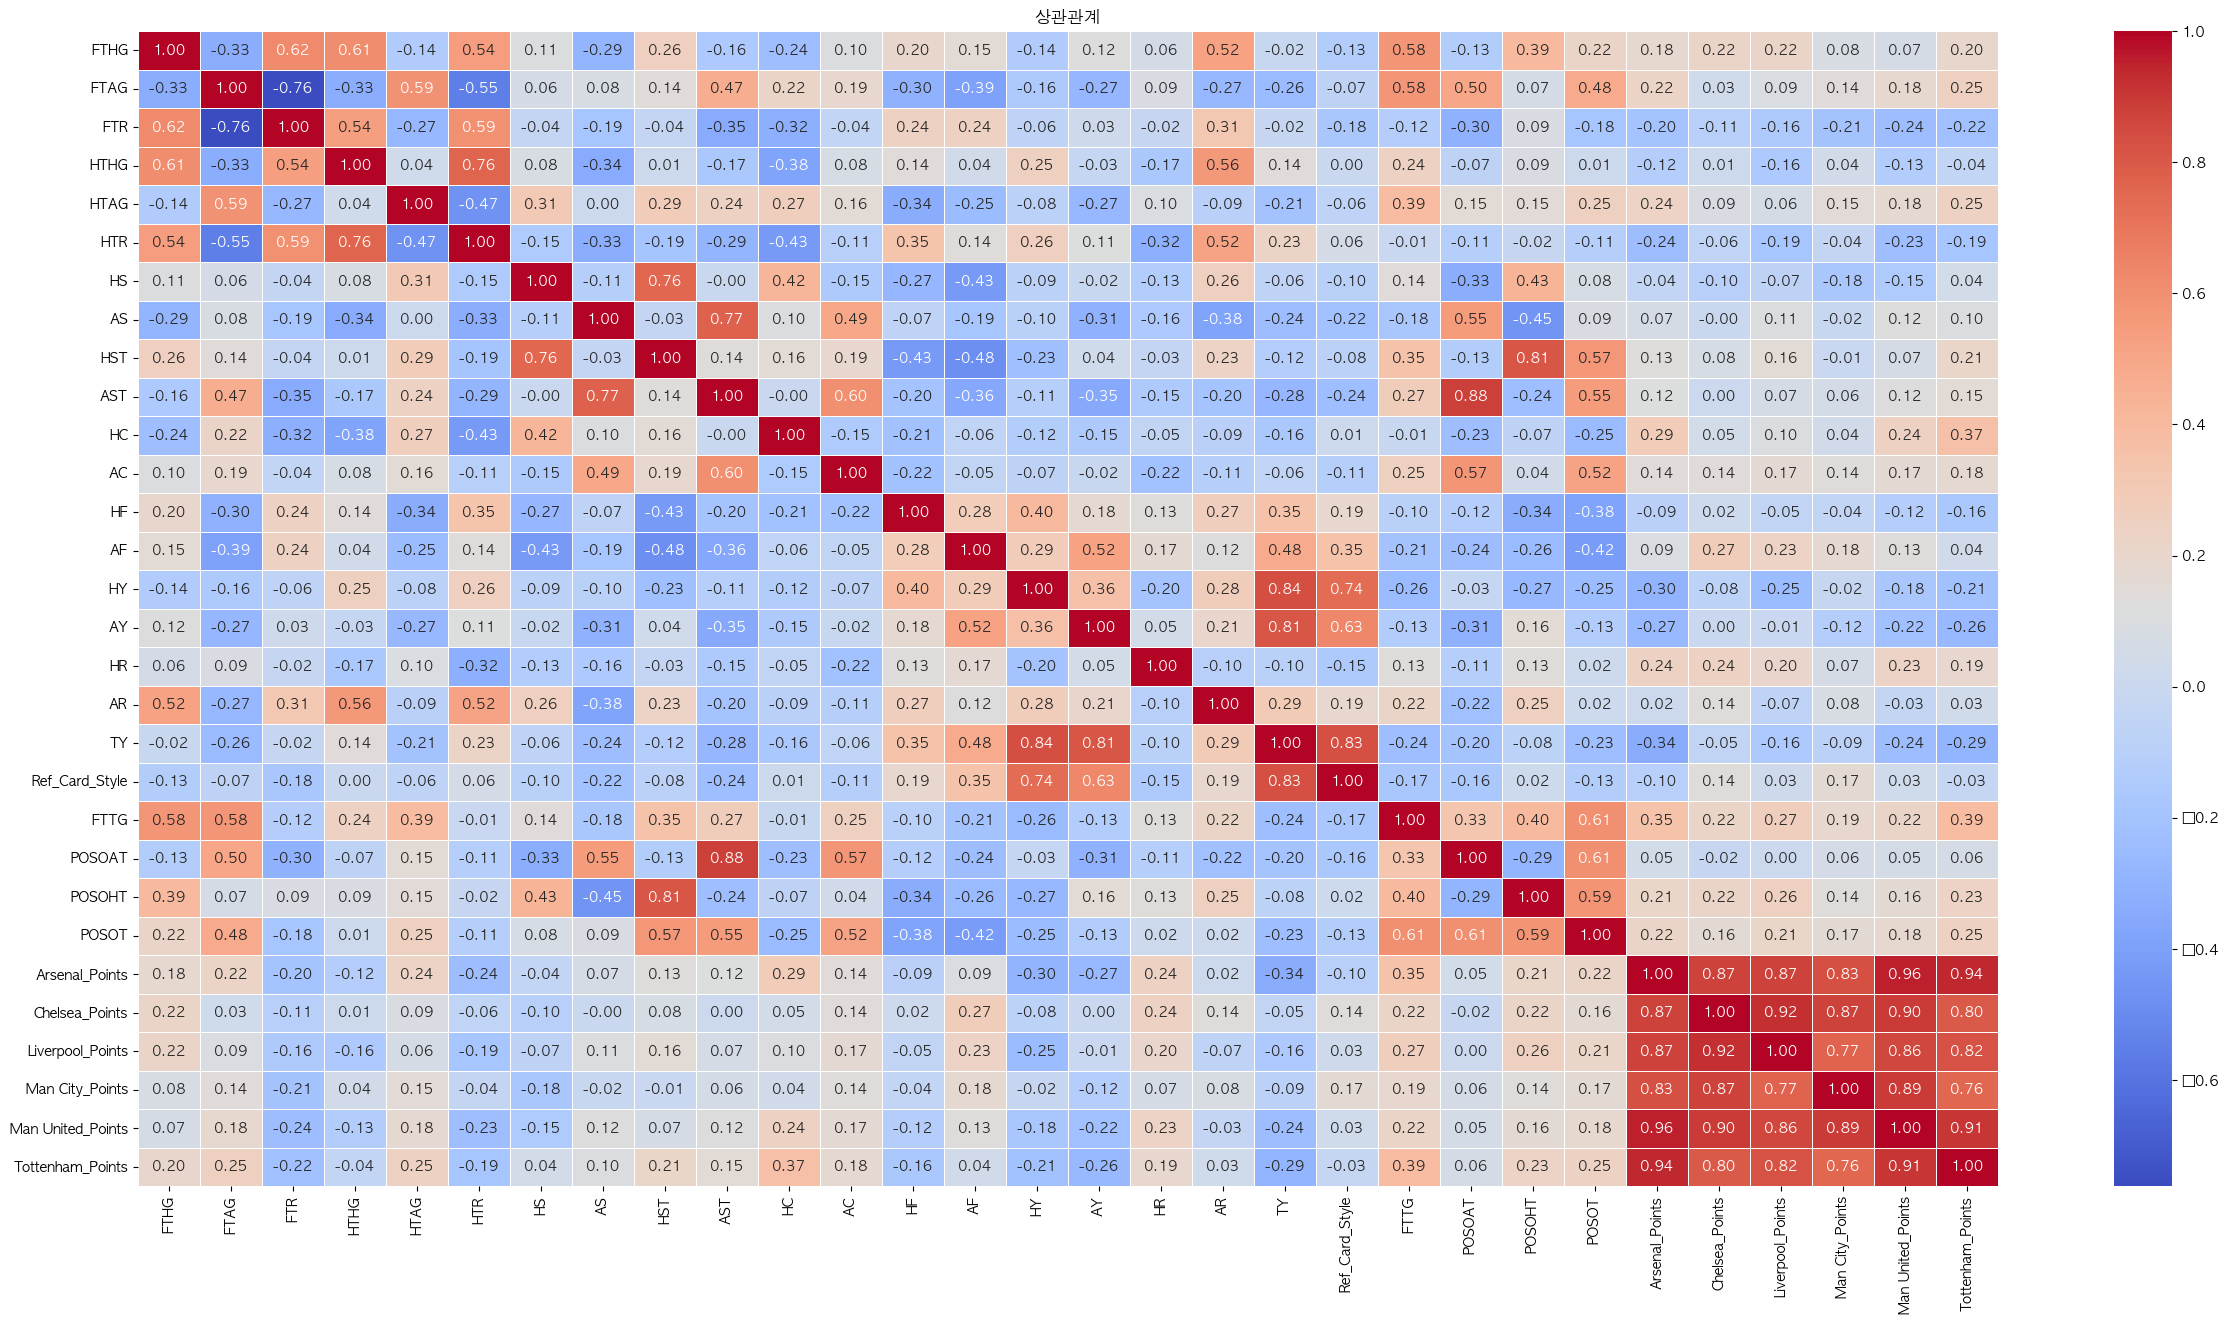

In [239]:
cor = s0203.drop(['HomeTeam_Arsenal', 'HomeTeam_Chelsea', 'HomeTeam_Liverpool',
       'HomeTeam_Man City', 'HomeTeam_Man United', 'HomeTeam_Tottenham',
       'AwayTeam_Arsenal', 'AwayTeam_Chelsea', 'AwayTeam_Liverpool',
       'AwayTeam_Man City', 'AwayTeam_Man United', 'AwayTeam_Tottenham',
       'DateTime', 'HomeTeam', 'AwayTeam','Referee'],axis = 1)
corrs = cor.corr()
plt.figure(figsize=(30, 15))
sns.heatmap(corrs, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('상관관계')
plt.show()